In [138]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install scipy

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
sns.set_theme(style="darkgrid", palette="muted", color_codes=True, font_scale=1.5, rc={"figure.figsize": (12, 6)})

In [140]:
df_cases=pd.read_csv('/Users/srikrishna/Coding/DataScience/Extraction/Covid/time_series_covid19_confirmed_global.csv')

In [141]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,203681,203829,203942,204094,204287,204392,204417,204510,204610,204724
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333055,333058,333071,333088,333103,333125,333138,333156,333161,333197
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270873,270881,270891,270906,270917,270924,270929,270939,270952,270969
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46588,46588,46588,46664,46664,46664,46664,46664,46664,46664
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [142]:
#cleaning the dataset

#deleting columns
df_cases=df_cases.drop(['Province/State','Lat','Long'],axis=1)

#deleting rows
df_cases=df_cases.iloc[: , :]

In [143]:
df_cases.describe

<bound method NDFrame.describe of            Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0             Afghanistan        0        0        0        0        0   
1                 Albania        0        0        0        0        0   
2                 Algeria        0        0        0        0        0   
3                 Andorra        0        0        0        0        0   
4                  Angola        0        0        0        0        0   
..                    ...      ...      ...      ...      ...      ...   
284    West Bank and Gaza        0        0        0        0        0   
285  Winter Olympics 2022        0        0        0        0        0   
286                 Yemen        0        0        0        0        0   
287                Zambia        0        0        0        0        0   
288              Zimbabwe        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  1/30/20  ...  11/6/22  11/7/22  11/8/22  \
0 

In [144]:
df_cases.drop(df_cases[(df_cases['Country/Region']!='Russia') & (df_cases['Country/Region']!='India') & (df_cases['Country/Region']!='Brazil') & (df_cases['Country/Region']!='US')].index, inplace=True)

df_cases.reset_index(inplace = True)
df_cases.drop('index',axis=1, inplace=True)
df_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22,11/11/22,11/12/22,11/13/22,11/14/22,11/15/22
0,Brazil,0,0,0,0,0,0,0,0,0,...,34849063,34855492,34855492,34855492,34889576,34908198,34908198,34908198,34908198,34908198
1,India,0,0,0,0,0,0,0,0,1,...,44661504,44660293,44660293,44660293,44664810,44665643,44666372,44666924,44667390,44667900
2,Russia,0,0,0,0,0,0,0,0,0,...,21158672,21163061,21167353,21172652,21178202,21183691,21189139,21194442,21198961,21203361
3,US,1,1,2,2,5,5,5,6,6,...,97749152,97787763,97817525,97913411,97978279,97990681,97995355,97997389,98045793,98086072


In [145]:
day_list=[x for x in range(1, 1030)]

In [146]:
brazil_cases = list(df_cases.iloc[0, 1:])
india_cases = list(df_cases.iloc[1, 1:])
russia_cases = list(df_cases.iloc[2, 1:])
us_cases = list(df_cases.iloc[3, 1:])

In [147]:
cases_df=pd.DataFrame(list(zip(day_list, brazil_cases, india_cases, russia_cases, us_cases)),columns =['days', 'Brazil', 'India', 'Russia', 'US'])

In [148]:
cases_df.head()

,days,Brazil,India,Russia,US
0,1,0,0,0,1
1,2,0,0,0,1
2,3,0,0,0,2
3,4,0,0,0,2
4,5,0,0,0,5


In [149]:
ls_idx = list(cases_df.columns)
print(ls_idx)

['days', 'Brazil', 'India', 'Russia', 'US']


In [150]:
cases_data_melted = cases_df.melt(id_vars=['days'], var_name='Country', value_name='Cases')

# Create a linear chart with multiple lines
fig = px.line(cases_data_melted, x='days', y='Cases', color='Country', title='COVID-19 Cases Over Time')

# Customize layout
fig.update_layout(
    xaxis_title='Day Count',
    yaxis_title='Cases',
    hovermode='x unified'
)

# Show the plot
fig.show()

In [151]:
def lorentz(x, amp1, cen1, wid1):
    return (amp1*wid1**2/((x-cen1)**2+wid1**2))

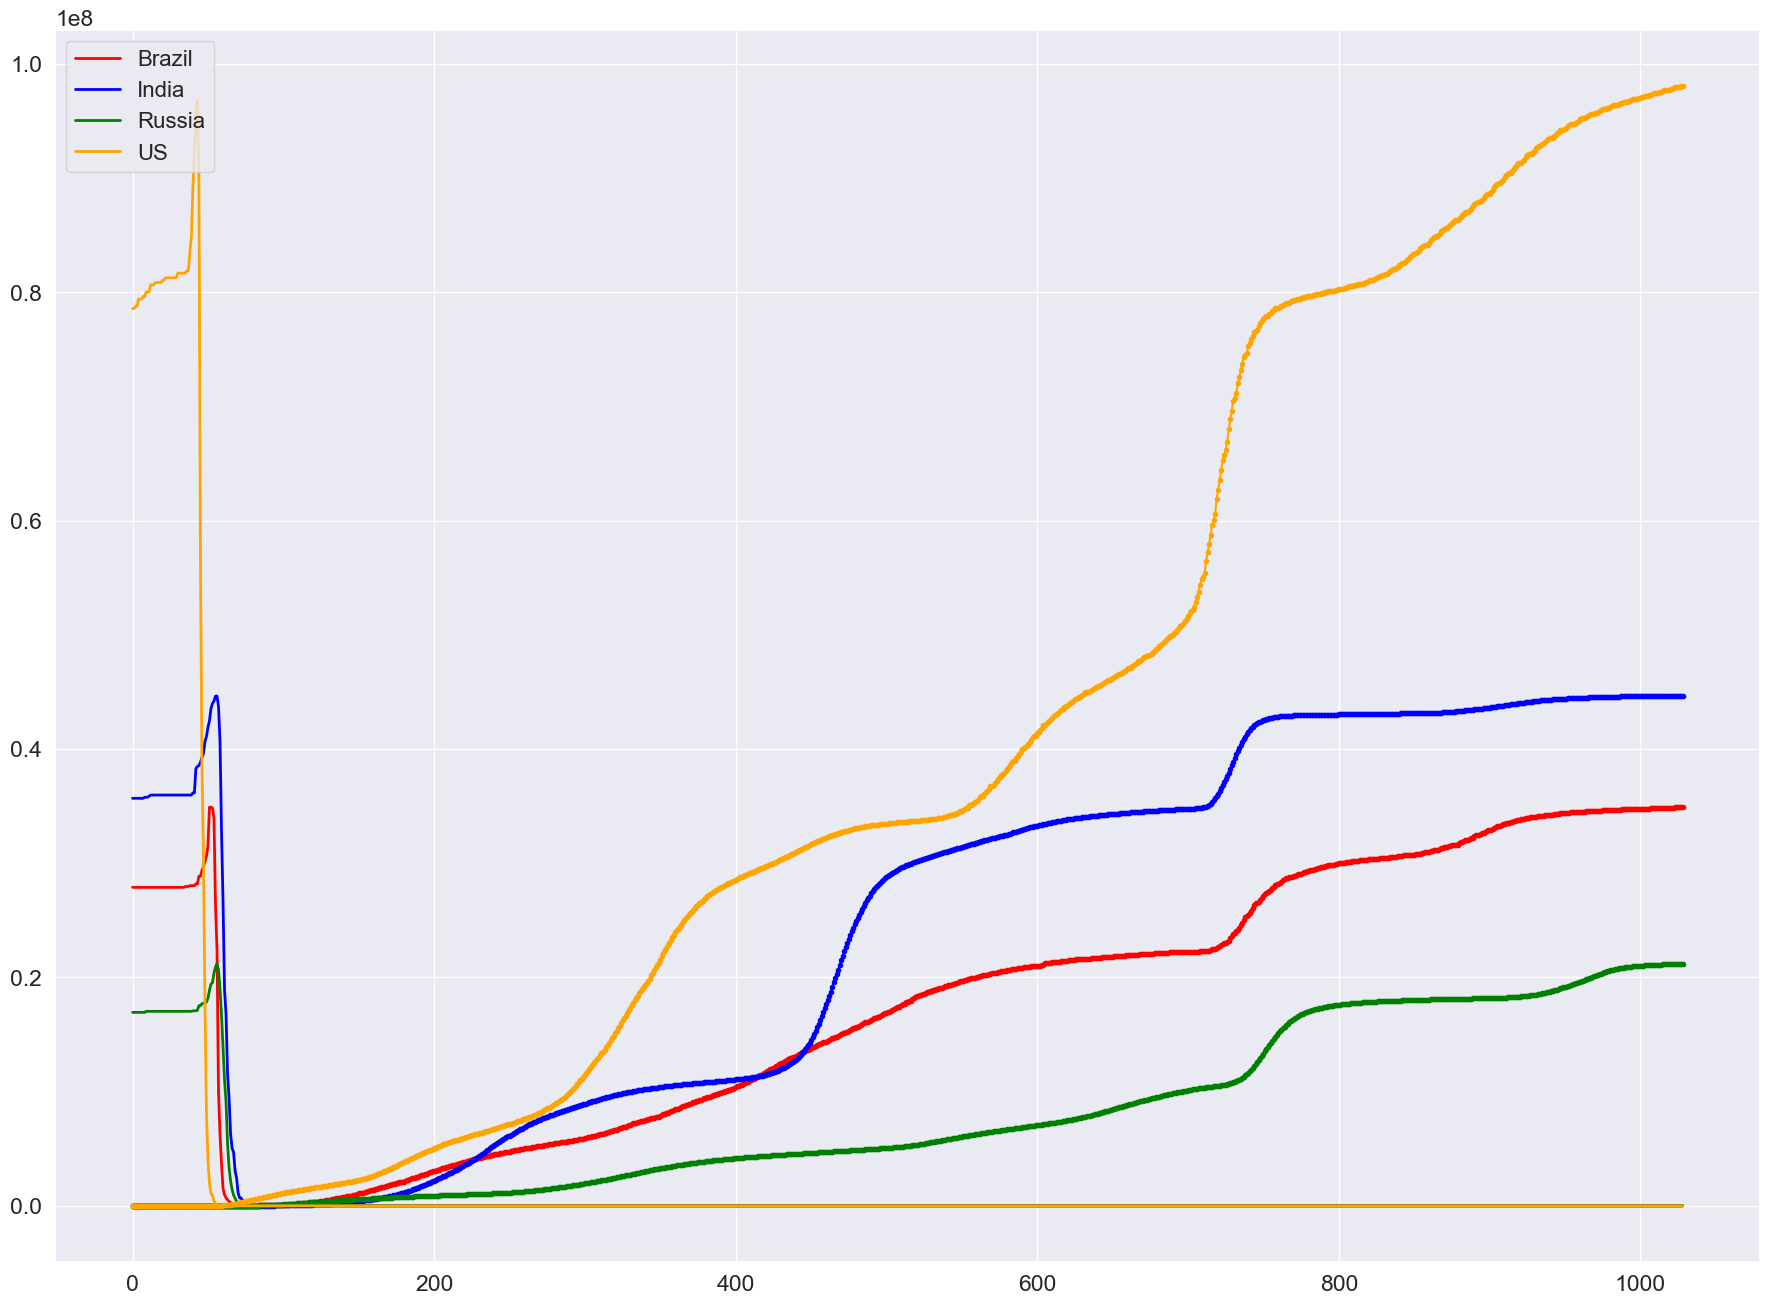

In [152]:
figure = plt.figure(figsize=(22,16))
amp1 = cases_df['Brazil'].max()
cen1 = 150
wid1 = 299
br, = plt.plot(lorentz(cases_df['Brazil'], cases_df['Brazil'].max(), cen1, wid1),color = 'red', linewidth=2.0, label='Brazil')
plt.plot(cases_df['Brazil'], color='red', marker = '.')
ind, =plt.plot(lorentz(cases_df['India'], cases_df['India'].max(), cen1, wid1),color = 'blue', linewidth=2.0, label='India')
plt.plot(cases_df['India'], color='blue', marker = '.')
rsa, = plt.plot(lorentz(cases_df['Russia'], cases_df['Russia'].max(), cen1, wid1),color = 'green', linewidth=2.0, label='Russia')
plt.plot(cases_df['Russia'], color='green', marker = '.')
us, = plt.plot(lorentz(cases_df['US'], cases_df['US'].max(), cen1, wid1),color = 'orange', linewidth=2.0, label='US')
plt.plot(cases_df['US'], color='orange', marker = '.')
leg = plt.legend(handles=[br, ind, rsa, us], loc='upper left', fontsize=16)
plt.show()

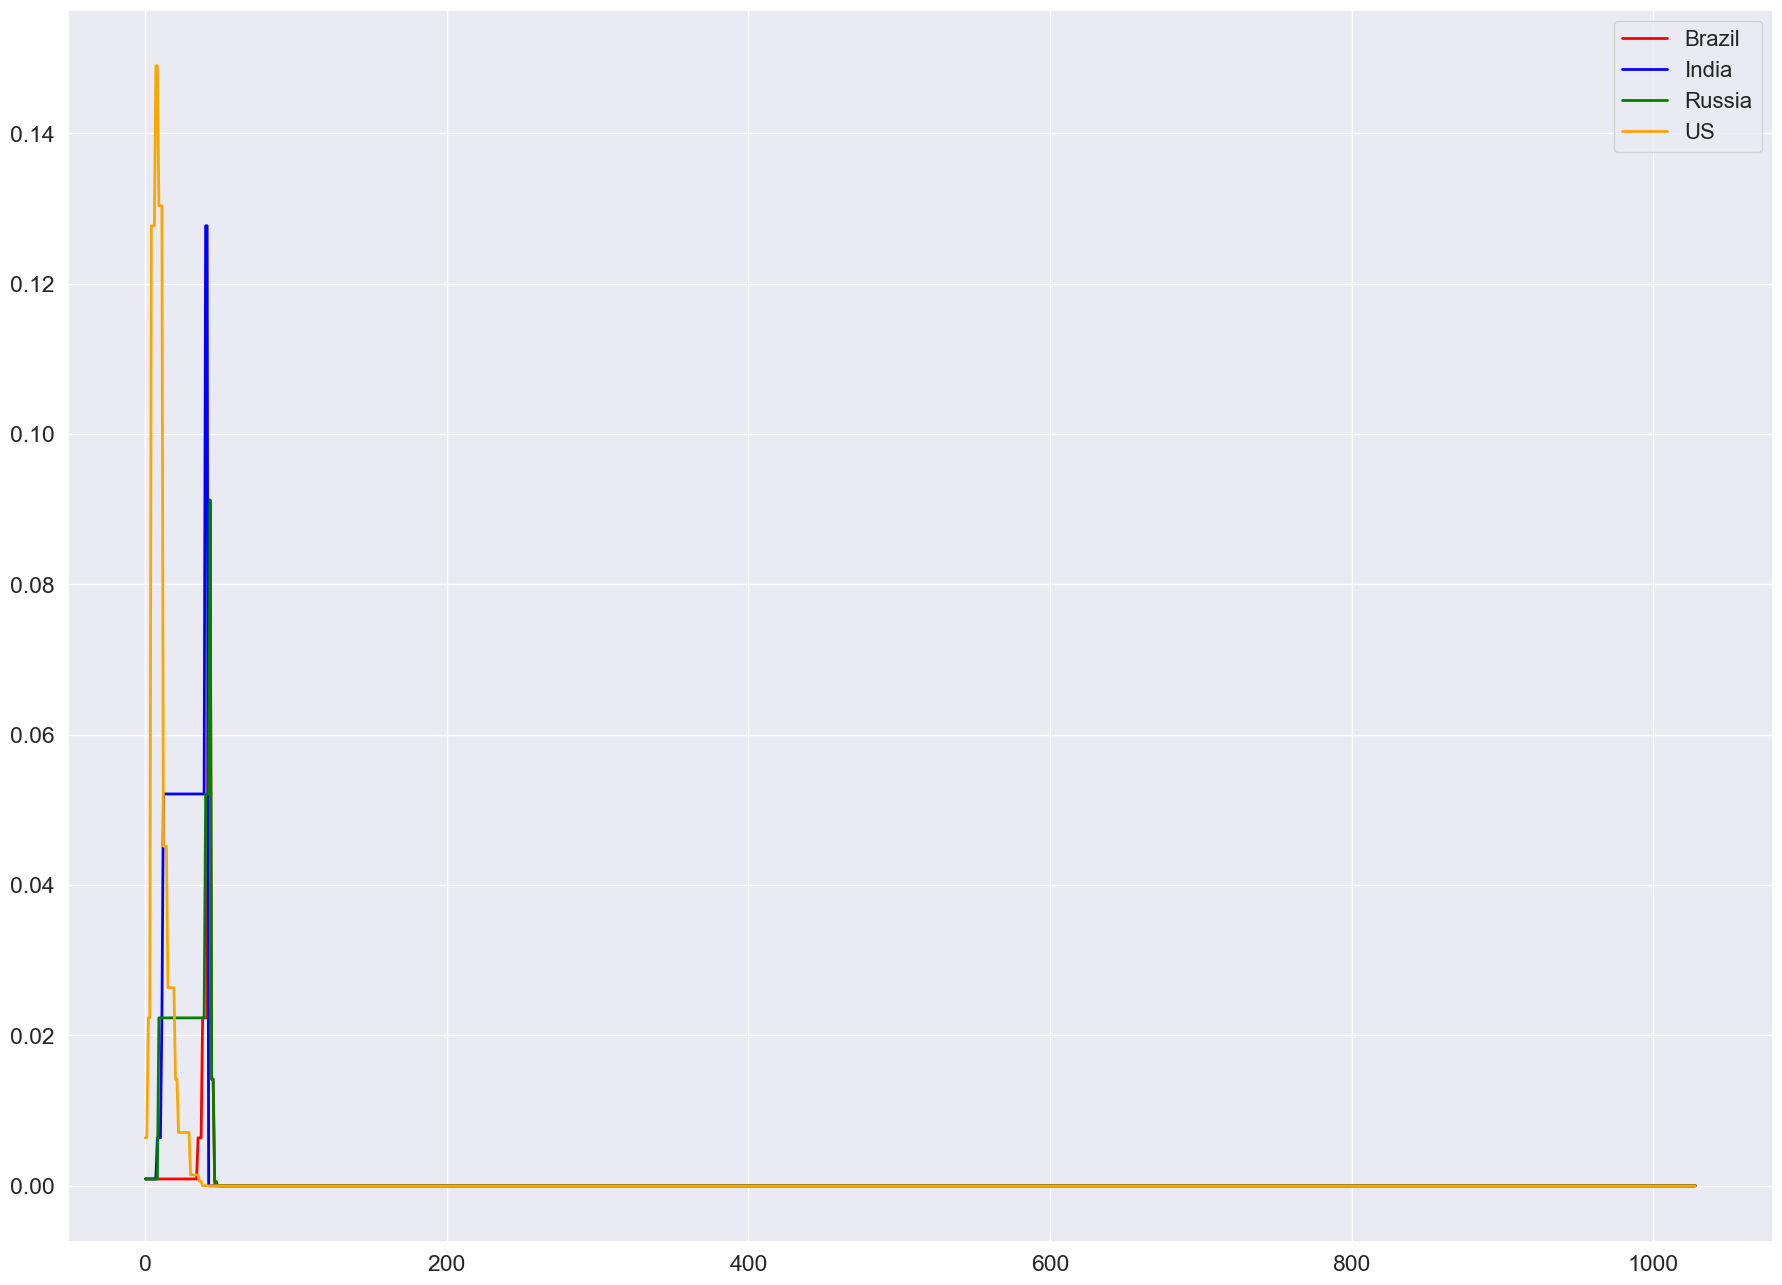

In [153]:
from scipy.stats import poisson

figure = plt.figure(figsize=(22,16))
br, = plt.plot(poisson.pmf(cases_df['Brazil'], mu=7),color = 'red', linewidth=2.0, label='Brazil')
ind, =plt.plot(poisson.pmf(cases_df['India'], mu=7),color = 'blue', linewidth=2.0, label='India')
rsa, = plt.plot(poisson.pmf(cases_df['Russia'], mu=7),color = 'green', linewidth=2.0, label='Russia')
us, = plt.plot(poisson.pmf(cases_df['US'], mu=7),color = 'orange', linewidth=2.0, label='US')
leg = plt.legend(handles=[br, ind, rsa, us], loc='upper right', fontsize=16)
plt.show()